In [94]:
#Exploring strategies to optimize time sampling to reproduce NOESY spectra

import openfermion as of

import sys
sys.path.append('./utils/')

from basis_utils import Sz,Sx,Sz, Sy
from basis_utils import read_spinach_info, build_list_ISTs, NormalizeBasis, build_symbolic_list_ISTs, MatRepLib
from simulation_utils import GenH0_Ham, HamMatRep, GenNOESYSpectrum, sqcosbell_2d_apod, GenFIDsignals
import scipy.io as spio
#from 
from scipy.linalg import expm
import cirq
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import savemat
import pickle



In [95]:
text4="""1      (0,0)   (0,0)   (0,0)   (0,0)   
  2      (0,0)   (0,0)   (0,0)   (1,1)   
  3      (0,0)   (0,0)   (0,0)   (1,0)   
  4      (0,0)   (0,0)   (0,0)   (1,-1)  
  5      (0,0)   (0,0)   (1,1)   (0,0)   
  6      (0,0)   (0,0)   (1,1)   (1,1)   
  7      (0,0)   (0,0)   (1,1)   (1,0)   
  8      (0,0)   (0,0)   (1,1)   (1,-1)  
  9      (0,0)   (0,0)   (1,0)   (0,0)   
  10     (0,0)   (0,0)   (1,0)   (1,1)   
  11     (0,0)   (0,0)   (1,0)   (1,0)   
  12     (0,0)   (0,0)   (1,0)   (1,-1)  
  13     (0,0)   (0,0)   (1,-1)  (0,0)   
  14     (0,0)   (0,0)   (1,-1)  (1,1)   
  15     (0,0)   (0,0)   (1,-1)  (1,0)   
  16     (0,0)   (0,0)   (1,-1)  (1,-1)  
  17     (0,0)   (1,1)   (0,0)   (0,0)   
  18     (0,0)   (1,1)   (0,0)   (1,1)   
  19     (0,0)   (1,1)   (0,0)   (1,0)   
  20     (0,0)   (1,1)   (0,0)   (1,-1)  
  21     (0,0)   (1,1)   (1,1)   (0,0)   
  22     (0,0)   (1,1)   (1,1)   (1,1)   
  23     (0,0)   (1,1)   (1,1)   (1,0)   
  24     (0,0)   (1,1)   (1,1)   (1,-1)  
  25     (0,0)   (1,1)   (1,0)   (0,0)   
  26     (0,0)   (1,1)   (1,0)   (1,1)   
  27     (0,0)   (1,1)   (1,0)   (1,0)   
  28     (0,0)   (1,1)   (1,0)   (1,-1)  
  29     (0,0)   (1,1)   (1,-1)  (0,0)   
  30     (0,0)   (1,1)   (1,-1)  (1,1)   
  31     (0,0)   (1,1)   (1,-1)  (1,0)   
  32     (0,0)   (1,1)   (1,-1)  (1,-1)  
  33     (0,0)   (1,0)   (0,0)   (0,0)   
  34     (0,0)   (1,0)   (0,0)   (1,1)   
  35     (0,0)   (1,0)   (0,0)   (1,0)   
  36     (0,0)   (1,0)   (0,0)   (1,-1)  
  37     (0,0)   (1,0)   (1,1)   (0,0)   
  38     (0,0)   (1,0)   (1,1)   (1,1)   
  39     (0,0)   (1,0)   (1,1)   (1,0)   
  40     (0,0)   (1,0)   (1,1)   (1,-1)  
  41     (0,0)   (1,0)   (1,0)   (0,0)   
  42     (0,0)   (1,0)   (1,0)   (1,1)   
  43     (0,0)   (1,0)   (1,0)   (1,0)   
  44     (0,0)   (1,0)   (1,0)   (1,-1)  
  45     (0,0)   (1,0)   (1,-1)  (0,0)   
  46     (0,0)   (1,0)   (1,-1)  (1,1)   
  47     (0,0)   (1,0)   (1,-1)  (1,0)   
  48     (0,0)   (1,0)   (1,-1)  (1,-1)  
  49     (0,0)   (1,-1)  (0,0)   (0,0)   
  50     (0,0)   (1,-1)  (0,0)   (1,1)   
  51     (0,0)   (1,-1)  (0,0)   (1,0)   
  52     (0,0)   (1,-1)  (0,0)   (1,-1)  
  53     (0,0)   (1,-1)  (1,1)   (0,0)   
  54     (0,0)   (1,-1)  (1,1)   (1,1)   
  55     (0,0)   (1,-1)  (1,1)   (1,0)   
  56     (0,0)   (1,-1)  (1,1)   (1,-1)  
  57     (0,0)   (1,-1)  (1,0)   (0,0)   
  58     (0,0)   (1,-1)  (1,0)   (1,1)   
  59     (0,0)   (1,-1)  (1,0)   (1,0)   
  60     (0,0)   (1,-1)  (1,0)   (1,-1)  
  61     (0,0)   (1,-1)  (1,-1)  (0,0)   
  62     (0,0)   (1,-1)  (1,-1)  (1,1)   
  63     (0,0)   (1,-1)  (1,-1)  (1,0)   
  64     (0,0)   (1,-1)  (1,-1)  (1,-1)  
  65     (1,1)   (0,0)   (0,0)   (0,0)   
  66     (1,1)   (0,0)   (0,0)   (1,1)   
  67     (1,1)   (0,0)   (0,0)   (1,0)   
  68     (1,1)   (0,0)   (0,0)   (1,-1)  
  69     (1,1)   (0,0)   (1,1)   (0,0)   
  70     (1,1)   (0,0)   (1,1)   (1,1)   
  71     (1,1)   (0,0)   (1,1)   (1,0)   
  72     (1,1)   (0,0)   (1,1)   (1,-1)  
  73     (1,1)   (0,0)   (1,0)   (0,0)   
  74     (1,1)   (0,0)   (1,0)   (1,1)   
  75     (1,1)   (0,0)   (1,0)   (1,0)   
  76     (1,1)   (0,0)   (1,0)   (1,-1)  
  77     (1,1)   (0,0)   (1,-1)  (0,0)   
  78     (1,1)   (0,0)   (1,-1)  (1,1)   
  79     (1,1)   (0,0)   (1,-1)  (1,0)   
  80     (1,1)   (0,0)   (1,-1)  (1,-1)  
  81     (1,1)   (1,1)   (0,0)   (0,0)   
  82     (1,1)   (1,1)   (0,0)   (1,1)   
  83     (1,1)   (1,1)   (0,0)   (1,0)   
  84     (1,1)   (1,1)   (0,0)   (1,-1)  
  85     (1,1)   (1,1)   (1,1)   (0,0)   
  86     (1,1)   (1,1)   (1,1)   (1,1)   
  87     (1,1)   (1,1)   (1,1)   (1,0)   
  88     (1,1)   (1,1)   (1,1)   (1,-1)  
  89     (1,1)   (1,1)   (1,0)   (0,0)   
  90     (1,1)   (1,1)   (1,0)   (1,1)   
  91     (1,1)   (1,1)   (1,0)   (1,0)   
  92     (1,1)   (1,1)   (1,0)   (1,-1)  
  93     (1,1)   (1,1)   (1,-1)  (0,0)   
  94     (1,1)   (1,1)   (1,-1)  (1,1)   
  95     (1,1)   (1,1)   (1,-1)  (1,0)   
  96     (1,1)   (1,1)   (1,-1)  (1,-1)  
  97     (1,1)   (1,0)   (0,0)   (0,0)   
  98     (1,1)   (1,0)   (0,0)   (1,1)   
  99     (1,1)   (1,0)   (0,0)   (1,0)   
  100    (1,1)   (1,0)   (0,0)   (1,-1)  
  101    (1,1)   (1,0)   (1,1)   (0,0)   
  102    (1,1)   (1,0)   (1,1)   (1,1)   
  103    (1,1)   (1,0)   (1,1)   (1,0)   
  104    (1,1)   (1,0)   (1,1)   (1,-1)  
  105    (1,1)   (1,0)   (1,0)   (0,0)   
  106    (1,1)   (1,0)   (1,0)   (1,1)   
  107    (1,1)   (1,0)   (1,0)   (1,0)   
  108    (1,1)   (1,0)   (1,0)   (1,-1)  
  109    (1,1)   (1,0)   (1,-1)  (0,0)   
  110    (1,1)   (1,0)   (1,-1)  (1,1)   
  111    (1,1)   (1,0)   (1,-1)  (1,0)   
  112    (1,1)   (1,0)   (1,-1)  (1,-1)  
  113    (1,1)   (1,-1)  (0,0)   (0,0)   
  114    (1,1)   (1,-1)  (0,0)   (1,1)   
  115    (1,1)   (1,-1)  (0,0)   (1,0)   
  116    (1,1)   (1,-1)  (0,0)   (1,-1)  
  117    (1,1)   (1,-1)  (1,1)   (0,0)   
  118    (1,1)   (1,-1)  (1,1)   (1,1)   
  119    (1,1)   (1,-1)  (1,1)   (1,0)   
  120    (1,1)   (1,-1)  (1,1)   (1,-1)  
  121    (1,1)   (1,-1)  (1,0)   (0,0)   
  122    (1,1)   (1,-1)  (1,0)   (1,1)   
  123    (1,1)   (1,-1)  (1,0)   (1,0)   
  124    (1,1)   (1,-1)  (1,0)   (1,-1)  
  125    (1,1)   (1,-1)  (1,-1)  (0,0)   
  126    (1,1)   (1,-1)  (1,-1)  (1,1)   
  127    (1,1)   (1,-1)  (1,-1)  (1,0)   
  128    (1,1)   (1,-1)  (1,-1)  (1,-1)  
  129    (1,0)   (0,0)   (0,0)   (0,0)   
  130    (1,0)   (0,0)   (0,0)   (1,1)   
  131    (1,0)   (0,0)   (0,0)   (1,0)   
  132    (1,0)   (0,0)   (0,0)   (1,-1)  
  133    (1,0)   (0,0)   (1,1)   (0,0)   
  134    (1,0)   (0,0)   (1,1)   (1,1)   
  135    (1,0)   (0,0)   (1,1)   (1,0)   
  136    (1,0)   (0,0)   (1,1)   (1,-1)  
  137    (1,0)   (0,0)   (1,0)   (0,0)   
  138    (1,0)   (0,0)   (1,0)   (1,1)   
  139    (1,0)   (0,0)   (1,0)   (1,0)   
  140    (1,0)   (0,0)   (1,0)   (1,-1)  
  141    (1,0)   (0,0)   (1,-1)  (0,0)   
  142    (1,0)   (0,0)   (1,-1)  (1,1)   
  143    (1,0)   (0,0)   (1,-1)  (1,0)   
  144    (1,0)   (0,0)   (1,-1)  (1,-1)  
  145    (1,0)   (1,1)   (0,0)   (0,0)   
  146    (1,0)   (1,1)   (0,0)   (1,1)   
  147    (1,0)   (1,1)   (0,0)   (1,0)   
  148    (1,0)   (1,1)   (0,0)   (1,-1)  
  149    (1,0)   (1,1)   (1,1)   (0,0)   
  150    (1,0)   (1,1)   (1,1)   (1,1)   
  151    (1,0)   (1,1)   (1,1)   (1,0)   
  152    (1,0)   (1,1)   (1,1)   (1,-1)  
  153    (1,0)   (1,1)   (1,0)   (0,0)   
  154    (1,0)   (1,1)   (1,0)   (1,1)   
  155    (1,0)   (1,1)   (1,0)   (1,0)   
  156    (1,0)   (1,1)   (1,0)   (1,-1)  
  157    (1,0)   (1,1)   (1,-1)  (0,0)   
  158    (1,0)   (1,1)   (1,-1)  (1,1)   
  159    (1,0)   (1,1)   (1,-1)  (1,0)   
  160    (1,0)   (1,1)   (1,-1)  (1,-1)  
  161    (1,0)   (1,0)   (0,0)   (0,0)   
  162    (1,0)   (1,0)   (0,0)   (1,1)   
  163    (1,0)   (1,0)   (0,0)   (1,0)   
  164    (1,0)   (1,0)   (0,0)   (1,-1)  
  165    (1,0)   (1,0)   (1,1)   (0,0)   
  166    (1,0)   (1,0)   (1,1)   (1,1)   
  167    (1,0)   (1,0)   (1,1)   (1,0)   
  168    (1,0)   (1,0)   (1,1)   (1,-1)  
  169    (1,0)   (1,0)   (1,0)   (0,0)   
  170    (1,0)   (1,0)   (1,0)   (1,1)   
  171    (1,0)   (1,0)   (1,0)   (1,0)   
  172    (1,0)   (1,0)   (1,0)   (1,-1)  
  173    (1,0)   (1,0)   (1,-1)  (0,0)   
  174    (1,0)   (1,0)   (1,-1)  (1,1)   
  175    (1,0)   (1,0)   (1,-1)  (1,0)   
  176    (1,0)   (1,0)   (1,-1)  (1,-1)  
  177    (1,0)   (1,-1)  (0,0)   (0,0)   
  178    (1,0)   (1,-1)  (0,0)   (1,1)   
  179    (1,0)   (1,-1)  (0,0)   (1,0)   
  180    (1,0)   (1,-1)  (0,0)   (1,-1)  
  181    (1,0)   (1,-1)  (1,1)   (0,0)   
  182    (1,0)   (1,-1)  (1,1)   (1,1)   
  183    (1,0)   (1,-1)  (1,1)   (1,0)   
  184    (1,0)   (1,-1)  (1,1)   (1,-1)  
  185    (1,0)   (1,-1)  (1,0)   (0,0)   
  186    (1,0)   (1,-1)  (1,0)   (1,1)   
  187    (1,0)   (1,-1)  (1,0)   (1,0)   
  188    (1,0)   (1,-1)  (1,0)   (1,-1)  
  189    (1,0)   (1,-1)  (1,-1)  (0,0)   
  190    (1,0)   (1,-1)  (1,-1)  (1,1)   
  191    (1,0)   (1,-1)  (1,-1)  (1,0)   
  192    (1,0)   (1,-1)  (1,-1)  (1,-1)  
  193    (1,-1)  (0,0)   (0,0)   (0,0)   
  194    (1,-1)  (0,0)   (0,0)   (1,1)   
  195    (1,-1)  (0,0)   (0,0)   (1,0)   
  196    (1,-1)  (0,0)   (0,0)   (1,-1)  
  197    (1,-1)  (0,0)   (1,1)   (0,0)   
  198    (1,-1)  (0,0)   (1,1)   (1,1)   
  199    (1,-1)  (0,0)   (1,1)   (1,0)   
  200    (1,-1)  (0,0)   (1,1)   (1,-1)  
  201    (1,-1)  (0,0)   (1,0)   (0,0)   
  202    (1,-1)  (0,0)   (1,0)   (1,1)   
  203    (1,-1)  (0,0)   (1,0)   (1,0)   
  204    (1,-1)  (0,0)   (1,0)   (1,-1)  
  205    (1,-1)  (0,0)   (1,-1)  (0,0)   
  206    (1,-1)  (0,0)   (1,-1)  (1,1)   
  207    (1,-1)  (0,0)   (1,-1)  (1,0)   
  208    (1,-1)  (0,0)   (1,-1)  (1,-1)  
  209    (1,-1)  (1,1)   (0,0)   (0,0)   
  210    (1,-1)  (1,1)   (0,0)   (1,1)   
  211    (1,-1)  (1,1)   (0,0)   (1,0)   
  212    (1,-1)  (1,1)   (0,0)   (1,-1)  
  213    (1,-1)  (1,1)   (1,1)   (0,0)   
  214    (1,-1)  (1,1)   (1,1)   (1,1)   
  215    (1,-1)  (1,1)   (1,1)   (1,0)   
  216    (1,-1)  (1,1)   (1,1)   (1,-1)  
  217    (1,-1)  (1,1)   (1,0)   (0,0)   
  218    (1,-1)  (1,1)   (1,0)   (1,1)   
  219    (1,-1)  (1,1)   (1,0)   (1,0)   
  220    (1,-1)  (1,1)   (1,0)   (1,-1)  
  221    (1,-1)  (1,1)   (1,-1)  (0,0)   
  222    (1,-1)  (1,1)   (1,-1)  (1,1)   
  223    (1,-1)  (1,1)   (1,-1)  (1,0)   
  224    (1,-1)  (1,1)   (1,-1)  (1,-1)  
  225    (1,-1)  (1,0)   (0,0)   (0,0)   
  226    (1,-1)  (1,0)   (0,0)   (1,1)   
  227    (1,-1)  (1,0)   (0,0)   (1,0)   
  228    (1,-1)  (1,0)   (0,0)   (1,-1)  
  229    (1,-1)  (1,0)   (1,1)   (0,0)   
  230    (1,-1)  (1,0)   (1,1)   (1,1)   
  231    (1,-1)  (1,0)   (1,1)   (1,0)   
  232    (1,-1)  (1,0)   (1,1)   (1,-1)  
  233    (1,-1)  (1,0)   (1,0)   (0,0)   
  234    (1,-1)  (1,0)   (1,0)   (1,1)   
  235    (1,-1)  (1,0)   (1,0)   (1,0)   
  236    (1,-1)  (1,0)   (1,0)   (1,-1)  
  237    (1,-1)  (1,0)   (1,-1)  (0,0)   
  238    (1,-1)  (1,0)   (1,-1)  (1,1)   
  239    (1,-1)  (1,0)   (1,-1)  (1,0)   
  240    (1,-1)  (1,0)   (1,-1)  (1,-1)  
  241    (1,-1)  (1,-1)  (0,0)   (0,0)   
  242    (1,-1)  (1,-1)  (0,0)   (1,1)   
  243    (1,-1)  (1,-1)  (0,0)   (1,0)   
  244    (1,-1)  (1,-1)  (0,0)   (1,-1)  
  245    (1,-1)  (1,-1)  (1,1)   (0,0)   
  246    (1,-1)  (1,-1)  (1,1)   (1,1)   
  247    (1,-1)  (1,-1)  (1,1)   (1,0)   
  248    (1,-1)  (1,-1)  (1,1)   (1,-1)  
  249    (1,-1)  (1,-1)  (1,0)   (0,0)   
  250    (1,-1)  (1,-1)  (1,0)   (1,1)   
  251    (1,-1)  (1,-1)  (1,0)   (1,0)   
  252    (1,-1)  (1,-1)  (1,0)   (1,-1)  
  253    (1,-1)  (1,-1)  (1,-1)  (0,0)   
  254    (1,-1)  (1,-1)  (1,-1)  (1,1)   
  255    (1,-1)  (1,-1)  (1,-1)  (1,0)   
  256    (1,-1)  (1,-1)  (1,-1)  (1,-1)"""



In [96]:
data_ala = read_spinach_info(text4)

basis_ala = build_list_ISTs(data_ala)
prefacts,Symb_ALA_basis = build_symbolic_list_ISTs(data_ala)

#Normbasis = NormalizeBasis(basis,n_qubits=4,checkOrth=True) I have verified the orthonormalization of the basis
Normbasis_ala = NormalizeBasis(basis_ala,n_qubits=4,checkOrth=False)
Normbasis_ala = np.array(Normbasis_ala)

# Random time sampling

In [97]:
import numpy as np
import random


def oneD_idx_to2D(idx,num_rows,num_cols):
    
    row_idx = int(np.ceil(idx/num_cols))-1
    col_idx = (idx-(row_idx+1)*num_cols-1)%num_cols

    return row_idx,col_idx


def Rand_samp_timeseries(data1,data2,N_samples):
    """
    Return the 2D FID randomly sampled  
    """
    rows, cols = data1.shape #It is assumed bot data1 and data2 are of the same shape

    unique_indices = np.random.choice(rows*cols, size=N_samples, replace=False)


    sampled_array1 = np.zeros_like(data1)
    sampled_array2 = np.zeros_like(data2)

    for idx in unique_indices:
        i,j = oneD_idx_to2D(idx,rows,cols)
        sampled_array1[i,j] = data1[i,j]
        sampled_array2[i,j] = data2[i,j]


    return sampled_array1,sampled_array2


def GenNOESYSpectrum_fromFID(fid_temp_1, fid_temp_2, fid_temp_3, fid_temp_4,zerofill1,zerofill2,returnFID=True):

    #fid_temp_1, fid_temp_2, fid_temp_3, fid_temp_4 = GenFIDsignals(Ham,R,Tpts1,Tpts2,rho0,coil,tmix,dt1,dt2,Lx,Ly)
    
    fid_test_cos = fid_temp_1 - fid_temp_3
    fid_test_sin = fid_temp_2 - fid_temp_4

    fid_cos = sqcosbell_2d_apod(fid_test_cos)
    fid_sin = sqcosbell_2d_apod(fid_test_sin)

    f1_cos = np.real(np.fft.fftshift(np.fft.fft2(fid_cos,[zerofill2],[0]),[0]))
    f1_sin = np.real(np.fft.fftshift(np.fft.fft2(fid_sin,[zerofill2],[0]),[0]))


    f1_states = f1_cos-1j*f1_sin

    spectrum = np.fft.fftshift(np.fft.fft2(f1_states,[zerofill1],[1]),[1])
    if returnFID:
        ###NOTE: return the FID witouth post-processing
        return spectrum, fid_test_cos-1j*fid_test_sin
    else:
        return spectrum


def GenNOESY_from_cos_sin(fid_cos,fid_sin,zerofill1,zerofill2):

    fid_cos = sqcosbell_2d_apod(fid_cos)
    fid_sin = sqcosbell_2d_apod(fid_sin)

    f1_cos = np.real(np.fft.fftshift(np.fft.fft2(fid_cos,[zerofill2],[0]),[0]))
    f1_sin = np.real(np.fft.fftshift(np.fft.fft2(fid_sin,[zerofill2],[0]),[0]))


    f1_states = f1_cos-1j*f1_sin

    spectrum = np.fft.fftshift(np.fft.fft2(f1_states,[zerofill1],[1]),[1])
    
    return spectrum




In [26]:
##Probing for a very simple model first...

sigma = 2.0
tot_pts = 1000
x = np.linspace(-10.0,10.0,tot_pts)

gauss = np.exp(-np.square(x)/sigma)


####Randomly sample along the x axis...
Nsamples = 800


unique_indices = np.random.choice(tot_pts, size=Nsamples, replace=False)

#sampled_values = np.array([gauss[r] for r in unique_indices])

filt_gauss = np.zeros_like(gauss)

for idx in unique_indices:
    filt_gauss[idx]=gauss[idx]


dft_gauss= np.fft.fft(np.fft.fftshift(gauss))

# Compute the frequency axis (optional, for plotting purposes)
freqs = np.fft.fftfreq(len(gauss))


dft_filt_gauss = np.fft.fft(np.fft.fftshift(filt_gauss))





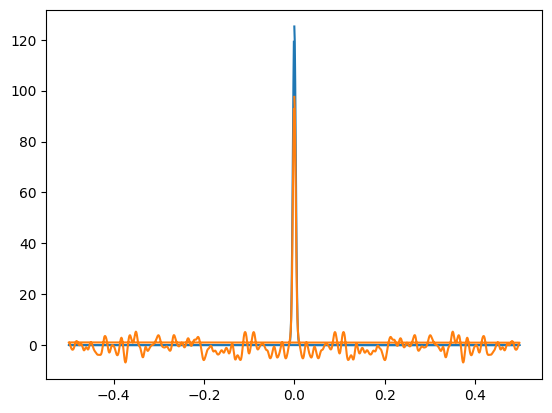

In [27]:
plt.plot(freqs,np.real(dft_gauss))
plt.plot(freqs,np.real(dft_filt_gauss))

In [98]:
####The FID of alanine....
loadMat = spio.loadmat('./data/NOESYdata_ALA_withGradients.mat',squeeze_me=True)

t_grid1 = loadMat['p']['time_grid1'].item()
t_grid2 = loadMat['p']['time_grid2'].item()

R_ala = loadMat['p']['R'].item()
H_ala = loadMat['p']['H'].item().toarray()

rho0 = np.array(loadMat['p']['rho0'].item().toarray())

coil = np.array(loadMat['p']['coil'].item())

Lx = loadMat['p']['Lx'].item().toarray() 
Ly = loadMat['p']['Ly'].item().toarray() 

###Dynamical evolution for calculation of 2D spectra...
Tpts1 = len(t_grid1)
Tpts2 = len(t_grid2)

#Parameters taken from Spinach script
tmix = 1.0
dt1 = 0.25e-3
dt2 = 0.25e-3
#dt1 = 0.00512
#dt2 = 0.00512
#Tpts1 = 50
#Tpts2 = 50

##Parameters for Fourier transform
zerofill1 = 4096
zerofill2 = 4096

#Defining the truncated version of the Relaxation matrix...
#R_trunc = np.copy(List_ala_jumps[0])

#R_trunc += List_ala_jumps[1]
#R_trunc += List_ala_jumps[2]
#Loading the truncated relaxation matrix....

f=open('./data/ALA_JOps.pk','rb')
dat=pickle.load(f)


R_trunc = np.zeros_like(R_ala.toarray())

for i in range(len(dat['JOps'])):
    R_trunc+=dat['JOps'][i]


#R_trunc is going to be the sum of the matrix representation of the three jump operators
fid_1_ref, fid_2_ref, fid_3_ref, fid_4_ref =  GenFIDsignals(H_ala,R_trunc,Tpts1,Tpts2,rho0,coil,tmix,dt1,dt2,Lx,Ly)



In [126]:
####scaling of signal resolution with the number of randomly sampled points...

fid_test_cos = fid_1_ref - fid_3_ref
fid_test_sin = fid_2_ref - fid_4_ref

def GetSigToNoiseRatio(fid_1,fid_2,fid_3,fid_4,Nsamples,Nexps,zerofill1,zerofill2):
    """
    fid_i, is the FID corresponding to the i-th phase cycle experiment
    Nsamples, corresponds to the number of randomly sampled points from the global FID
    Nexps, number of instances to perform the average over
    """

    fid_cos = fid_1 - fid_3
    fid_sin = fid_2 - fid_4
    Av_spec = np.zeros_like([zerofill1,zerofill2])
    Sqrd_spec = np.zeros_like([zerofill1,zerofill2])

    #List_specs = []


    for i in range(Nexps):
        filt_cos_fid, filt_sin_fid = Rand_samp_timeseries(fid_cos,fid_sin,Nsamples)
        rand_spec=np.real(-1.0*GenNOESY_from_cos_sin(filt_cos_fid,filt_sin_fid,zerofill1,zerofill2))
        #List_specs.append(rand_spec)

        Av_spec+=rand_spec
        Sqrd_spec+=np.square(rand_spec)
    
    ####Average spectrum 
    Av_spec= Av_spec/Nexps

    ##calculation of standard deviation...
    std_spec = np.sqrt(Sqrd_spec/Nexps -np.square(Av_spec))
    return std_spec


def GetSigToNoiseRatio_singpt(fid_1,fid_2,fid_3,fid_4,Nsamples,Nexps,zerofill1,zerofill2,loc):
    fid_cos = fid_1 - fid_3
    fid_sin = fid_2 - fid_4
    Av_sig = 0.0
    Sqrd_sig = 0.0

    #List_specs = []


    for i in range(Nexps):
        filt_cos_fid, filt_sin_fid = Rand_samp_timeseries(fid_cos,fid_sin,Nsamples)
        rand_spec=np.real(-1.0*GenNOESY_from_cos_sin(filt_cos_fid,filt_sin_fid,zerofill1,zerofill2))
        
        Av_sig+=rand_spec[loc[0],loc[1]]
        
        Sqrd_sig+=np.square(rand_spec[loc[0],loc[1]])
    
    ####Average spectrum 
    Av_sig= Av_sig/Nexps

    ##calculation of standard deviation...
    Av_sqr = Sqrd_sig/Nexps
    std_spec = np.sqrt(Av_sqr -np.square(Av_sig))
    return Av_sig,Av_sqr,np.abs(Av_sig)/std_spec



In [128]:
450**2

202500

In [165]:
#####For a fixed number of instantiations, we get the dependence of resolution with the number of sampling points...

Nexps=50
zerofill1=1024
zerofill2=1024


###Generate data and plot 
Samp_array =[]
for i in range(1,10):
    Samp_array.append((i*50)**2)

Dat = []
for j in range(len(Samp_array)):
    av,sqr,sig_rat = GetSigToNoiseRatio_singpt(fid_1_ref,fid_2_ref,fid_3_ref,fid_4_ref,Samp_array[j],Nexps,zerofill1,zerofill2,[404,665])
    Dat.append([av,sqr,sig_rat])


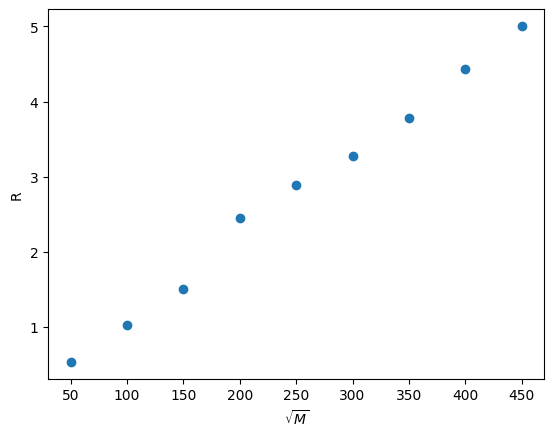

In [167]:

dat = np.array(Dat).reshape([len(Samp_array),3])[:,2]
plt.scatter(np.sqrt(Samp_array),dat)
plt.xlabel(r'$\sqrt{M}$')
plt.ylabel('R')

plt.savefig('./plots/ALA_signoise_50reps.pdf', format='pdf', dpi=300,bbox_inches='tight')

In [155]:
np.array(Dat).reshape([len(Samp_array),3])[:,2]

array([0.13732111, 0.96024883, 1.64021456, 2.17382085, 2.91603062,
       3.05545132, 3.88743935, 4.7778816 , 5.64683589])

In [163]:
#best_samp_array = np.copy(Samp_array)
#best_dat = np.copy(np.array(Dat).reshape([len(Samp_array),3])[:,2])

Text(0, 0.5, 'R')

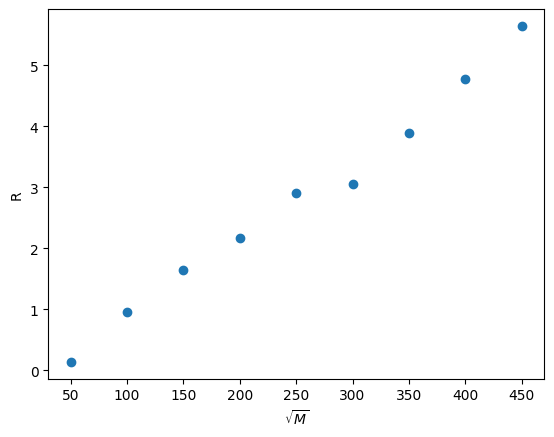

In [164]:

plt.scatter(np.sqrt(best_samp_array),best_dat)
plt.xlabel(r'$\sqrt{M}$')
plt.ylabel('R')


In [ ]:
fid_test_cos = fid_1_ref - fid_3_ref
fid_test_sin = fid_2_ref - fid_4_ref


####We sample
##fraction of total number of points to sample...
#f = 0.75 
#N_samples = int(f*fid_test_cos.shape[0]*fid_test_cos.shape[1]) 

N_samples = 2500

filt_cos_fid, filt_sin_fid = Rand_samp_timeseries(fid_test_cos,fid_test_sin,N_samples)

In [4]:
fid_test_cos = fid_1_ref - fid_2_ref
fid_test_sin = fid_3_ref - fid_4_ref

In [100]:

#RefSpec = -1.0*GenNOESYSpectrum_fromFID(fid_1_ref, fid_2_ref, fid_3_ref, fid_4_ref,zerofill1,zerofill2,returnFID=False)
RefSpec = -1.0*GenNOESYSpectrum_fromFID(fid_1_ref, fid_2_ref, fid_3_ref, fid_4_ref,1024,1024,returnFID=False)

In [101]:
np.shape(RefSpec)

(1024, 1024)

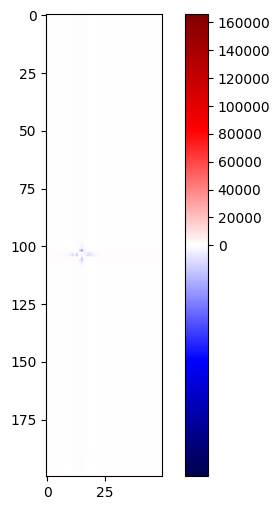

In [117]:
norm = TwoSlopeNorm(vmin=np.min(np.real(RefSpec)), vcenter=0, vmax=np.max(np.real(RefSpec)))

plt.figure(figsize=(6, 6))
plt.imshow(np.real(RefSpec)[300:500,650:700], cmap='seismic',norm=norm)
plt.colorbar()
plt.show()

In [118]:
np.max(np.max(RefSpec[300:500,650:700]))

(4303.167465855183-366.2924018293607j)

In [119]:
np.where(RefSpec==np.max(RefSpec[300:500,650:700]))

(array([404]), array([665]))

In [120]:
RefSpec[404,665]

(4303.167465855183-366.2924018293607j)

In [105]:
zerofill1

4096

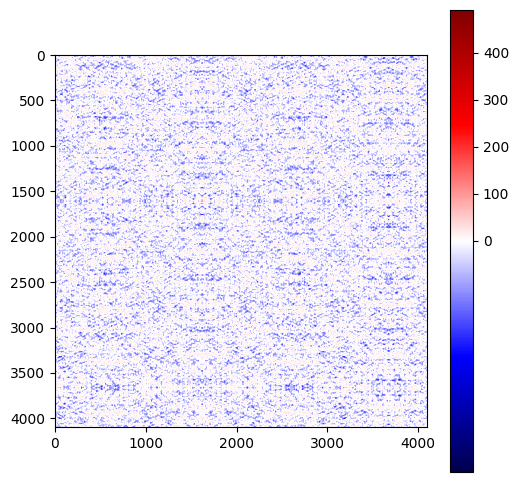

In [27]:
####Calculation of 2D FID from  the generated signals...

fid_test_cos = fid_1_ref - fid_3_ref
fid_test_sin = fid_2_ref - fid_4_ref


####We sample
##fraction of total number of points to sample...
#f = 0.75 
#N_samples = int(f*fid_test_cos.shape[0]*fid_test_cos.shape[1]) 

N_samples = 2500

filt_cos_fid, filt_sin_fid = Rand_samp_timeseries(fid_test_cos,fid_test_sin,N_samples)


Rand_spec=-1.0*GenNOESY_from_cos_sin(filt_cos_fid,filt_sin_fid,zerofill1,zerofill2)


norm = TwoSlopeNorm(vmin=np.min(np.real(Rand_spec)), vcenter=0, vmax=np.max(np.real(Rand_spec)))

plt.figure(figsize=(6, 6))
plt.imshow(np.real(Rand_spec), cmap='seismic',norm=norm)
plt.colorbar()
plt.show()

#savemat('ALA_truncR_FIDcos_rand0.2f.mat', {'FID_cos': filt_cos_fid})
#savemat('ALA_truncR_FIDsin_rand0.2f.mat', {'FID_sin': filt_sin_fid})



In [50]:
#####Loop over a given number of realizations to enhance signal-to-noise ratio...
fid_test_cos = fid_1_ref - fid_3_ref
fid_test_sin = fid_2_ref - fid_4_ref

N_samples = 2500

N_realizations = 300

Final_spec = np.zeros_like(fid_test_cos)

for i in range(N_realizations):

    filt_cos_fid, filt_sin_fid = Rand_samp_timeseries(fid_test_cos,fid_test_sin,N_samples)
    Rand_spec=-1.0*GenNOESY_from_cos_sin(filt_cos_fid,filt_sin_fid,1024,1024)

    Final_spec+=Rand_spec


Final_spec = Final_spec/N_realizations


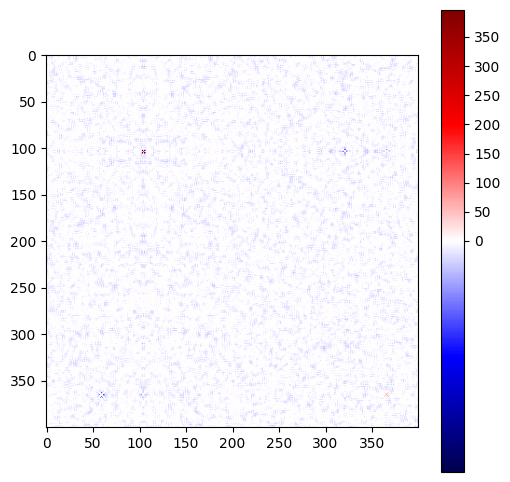

In [51]:
norm = TwoSlopeNorm(vmin=np.min(np.real(Final_spec)), vcenter=0, vmax=np.max(np.real(Final_spec)))

plt.figure(figsize=(6, 6))
plt.imshow(np.real(Final_spec[300:700,300:700]), cmap='seismic',norm=norm)
plt.colorbar()

#plt.savefig('./plots/ALANOESY_Rand_25e2pts_50reps.pdf', format='pdf', dpi=300,bbox_inches='tight')
plt.show()

# Variances of total magnetization across the sampled time points

In [330]:
def Trans_to_op(rho_vect,NormBasis):
    """
    Transform density matrix vector to matrix to verify hermiticity and other properties... 
    """
    Tot_op = of.QubitOperator()
    for i in range(len(rho_vect)):
        Tot_op+=rho_vect[i]*NormBasis[i]

    return Tot_op




In [13]:
####Adapting the sampling of the FID signal to compute variances of total magnetization...

def Get_Sx_squared_vec(Symb_basis,nqubs,norm_pref=1.0):
    """
    The normalization prefactor is needed as we want the observable that is necessarily normalized, while the simulations are performed in a normalized basis 
    """


    cleaned_list = [' '.join(s.split()) for s in Symb_basis]

    ####Generate the list of strings of operators that compose Sx^2...
    listSx_ops = []
    list_prefact = []

    for k in range(nqubs):
        for l in range(k+1,nqubs):
            str1 = 'S+'+str(k)+' S+'+str(l)
            str2 = 'S+'+str(k)+' S-'+str(l)
            str3 = 'S-'+str(k)+' S+'+str(l)
            str4 = 'S-'+str(k)+' S-'+str(l)

            listSx_ops.append(str1)
            listSx_ops.append(str2)
            listSx_ops.append(str3)
            listSx_ops.append(str4)

            list_prefact.append(0.5)
            list_prefact.append(-0.5)
            list_prefact.append(-0.5)
            list_prefact.append(0.5)

    Sx_vec = np.zeros(len(Symb_basis))

    for i in range(len(listSx_ops)):
        Op = listSx_ops[i]
        pref = list_prefact[i]

        for k in range(len(cleaned_list)):
            if cleaned_list[k] == Op:
                #print(k)
                Sx_vec[k]=0.5*pref # the 1/2 prefactor is due to the transformation S_plus -> S_x and summming while avoiding double counting

    return Sx_vec*norm_pref**2 

def Get_Sy_squared_vec(Symb_basis,nqubs,norm_pref=1.0):
    cleaned_list = [' '.join(s.split()) for s in Symb_basis]

    ####Generate the list of strings of operators that compose Sx^2...
    listSx_ops = []
    list_signs = []
    for k in range(nqubs):
        for l in range(k+1,nqubs):
            str1 = 'S+'+str(k)+' S+'+str(l)
            str2 = 'S+'+str(k)+' S-'+str(l)
            str3 = 'S-'+str(k)+' S+'+str(l)
            str4 = 'S-'+str(k)+' S-'+str(l)

            listSx_ops.append(str1)
            listSx_ops.append(str2)
            listSx_ops.append(str3)
            listSx_ops.append(str4)
            list_signs.append(0.5)
            list_signs.append(0.5)
            list_signs.append(0.5)
            list_signs.append(0.5)

    Sy_vec = np.zeros(len(Symb_basis))

    for i in range(len(listSx_ops)):
        Op = listSx_ops[i]
        pref = list_signs[i]

        for k in range(len(cleaned_list)):
            if cleaned_list[k] == Op:
                #print(k, "sign: ",list_signs[i])
                Sy_vec[k]=0.5*list_signs[i]

    return -Sy_vec*norm_pref**2

def Get_SxSy_vecs(Symb_basis,nqubs,norm_fact=1.0):
    """
    We introduce the normalization factor norm_fact variable, since we want the Sx and Sy vectors in a non-normalized basis, whereas the simulations are
    performed in a normalized basis, then, we need to scale vector accordingly
    """

    cleaned_list = [' '.join(s.split()) for s in Symb_basis]
    ###list of vectors:
    list_S_plus = []
    list_S_minus = []

    for i in range(nqubs):
        str1 = 'S+'+str(i)
        str2 = 'S-'+str(i)
        list_S_plus.append(str1)
        list_S_minus.append(str2)

    S_plus_vec = np.zeros(256)
    S_minus_vec = np.zeros(256)

    for i in range(nqubs):
        Sp_op = list_S_plus[i]
        Sm_op = list_S_minus[i]

        for k in range(len(cleaned_list)):
            if Sp_op == cleaned_list[k]:
                S_plus_vec[k] = -np.sqrt(2)
            if Sm_op == cleaned_list[k]:
                S_minus_vec[k] = np.sqrt(2)

    ###Sx and Sy vectors are linear combinations of the S_plus and S_minus vectors...
    Sx_vec = 0.5*(S_plus_vec+S_minus_vec)
    Sy_vec = -1j*0.5*(S_plus_vec-S_minus_vec)

    return Sx_vec*norm_fact, Sy_vec*norm_fact



def GenExp_andVarsignals(Ham,R,Tpts1,Tpts2,rho0,lamb,tmix,dt1,dt2,Lx,Ly,symb_basis,nqubs):
    """"
    lambda is  the scaling vector of total polarization in the initial vector
    """
    #Dim = Ham.shape[0]
    Lnet = Ham+1j*R 
    L_dt1 = expm(-1j*Lnet*dt1)
    L_dt2 = expm(-1j*Lnet*dt2)
    pulse_mix = expm(-1j*Lnet*tmix)


    pulse_90x = expm(-1j*Lx*np.pi/2)
    pulse_90y = expm(-1j*Ly*np.pi/2)
    pulse_90mx = expm(1j*Lx*np.pi/2)
    pulse_90my = expm(1j*Ly*np.pi/2)


    #First 90x pulse:
    rho_t = np.copy(rho0*lamb)
    rho_t = np.dot(pulse_90x,rho_t)

    rho_stack = []
    rho_stack.append(rho_t)

    rho_temp = np.copy(rho_t)
    for i in range(1,Tpts1):
        rho_temp = np.dot(L_dt1,rho_temp)
        rho_stack.append(rho_temp)


    rho_stack1_1 = []
    rho_stack1_2 = []
    rho_stack1_3 = []
    rho_stack1_4 = []

    for i in range(Tpts1):
        rho_stack1_1.append(pulse_90y@pulse_mix@pulse_90x@rho_stack[i])
        rho_stack1_2.append(pulse_90y@pulse_mix@pulse_90y@rho_stack[i])
        rho_stack1_3.append(pulse_90y@pulse_mix@pulse_90mx@rho_stack[i])
        rho_stack1_4.append(pulse_90y@pulse_mix@pulse_90my@rho_stack[i])


    sqrd_X = np.zeros([Tpts2,Tpts1],dtype=complex)
    X_expect = np.zeros([Tpts2,Tpts1],dtype=complex)

    sqrd_Y = np.zeros([Tpts2,Tpts1],dtype=complex)
    Y_expect = np.zeros([Tpts2,Tpts1],dtype=complex)


    Sx,Sy = Get_SxSy_vecs(symb_basis,nqubs,2)
    Sx2 = Get_Sx_squared_vec(symb_basis,nqubs,2)
    Sy2 = Get_Sy_squared_vec(symb_basis,nqubs,2)

    for i in range(Tpts1):
        
        rho1 = rho_stack1_1[i].flatten()
        rho2 = rho_stack1_2[i].flatten()
        rho3 = rho_stack1_3[i].flatten()
        rho4 = rho_stack1_4[i].flatten()

        for j in range(Tpts2):
            #fid_temp_1[j,i] = np.dot(coil,rho1)
            sqrd_X[j,i] = np.dot(Sx2,rho1)+nqubs/4 ### we add the constant factor when tracing over S_{x,tot}^2
            X_expect[j,i] = np.dot(Sx,rho1)
            sqrd_Y[j,i] = np.dot(Sy2,rho1)+nqubs/4
            Y_expect[j,i] = np.dot(Sy,rho1)
            rho1 = L_dt2@rho1

            #fid_temp_2[j,i] = np.dot(coil,rho2)

            rho2 = L_dt2@rho2

            #fid_temp_3[j,i] = np.dot(coil,rho3)
            rho3 = L_dt2@rho3

            #fid_temp_4[j,i] = np.dot(coil,rho4)
            rho4 = L_dt2@rho4
    
    return sqrd_X,X_expect,sqrd_Y,Y_expect,rho_stack1_1 #fid_temp_1, fid_temp_2, fid_temp_3, fid_temp_4




In [543]:
gammaH = 2.6752e8
B0 = 14.1
k = 2.083661912e10
T=298

lamb = gammaH*B0/(k*T)


In [544]:

sqrd_X,X_expect,sqrd_Y,Y_expect, rho_stack1_1 = GenExp_andVarsignals(H_ala,R_trunc,Tpts1,Tpts2,rho0,lamb,tmix,dt1,dt2,Lx,Ly,Symb_ALA_basis,4)


In [550]:
####Verifying that the results make sense (positive variance, real expectation values of observables)
VarX = sqrd_X - np.square(X_expect)
VarY = sqrd_Y - np.square(Y_expect)


# Verifying spectral changes after coarse-graining time sampling rate

In [168]:
from scipy.signal import convolve2d

In [172]:
dt1*Tpts1/50

0.00512

In [190]:
512*5e-4

0.256

In [215]:
1024*0.25e-3

0.256

In [216]:
loadMat = spio.loadmat('./data/NOESYdata_ALA_withGradients.mat',squeeze_me=True)

t_grid1 = loadMat['p']['time_grid1'].item()
t_grid2 = loadMat['p']['time_grid2'].item()

R_ala = loadMat['p']['R'].item()
H_ala = loadMat['p']['H'].item().toarray()

rho0 = np.array(loadMat['p']['rho0'].item().toarray())

coil = np.array(loadMat['p']['coil'].item())

Lx = loadMat['p']['Lx'].item().toarray() 
Ly = loadMat['p']['Ly'].item().toarray() 

###Dynamical evolution for calculation of 2D spectra...
#Tpts1 = len(t_grid1)
#Tpts2 = len(t_grid2)

#Tpts1 = 512
#Tpts2 = 512
Tpts1 = 1024
Tpts2 = 1024
#Tpts1 = 50
#Tpts2 = 50


#Parameters taken from Spinach script
tmix = 1.0
dt1 = 0.25e-3
dt2 = 0.25e-3
#dt1 = 5e-4
#dt2 = 5e-4
#dt1 = 0.00512
#dt2 = 0.00512
#Tpts1 = 50
#Tpts2 = 50

##Parameters for Fourier transform
zerofill1 = 4096
zerofill2 = 4096

#Defining the truncated version of the Relaxation matrix...
#R_trunc = np.copy(List_ala_jumps[0])

#R_trunc += List_ala_jumps[1]
#R_trunc += List_ala_jumps[2]
#Loading the truncated relaxation matrix....

f=open('./data/ALA_JOps.pk','rb')
dat=pickle.load(f)


R_trunc = np.zeros_like(R_ala.toarray())

for i in range(len(dat['JOps'])):
    R_trunc+=dat['JOps'][i]


#R_trunc is going to be the sum of the matrix representation of the three jump operators
fid_1_ref, fid_2_ref, fid_3_ref, fid_4_ref =  GenFIDsignals(H_ala,R_trunc,Tpts1,Tpts2,rho0,coil,tmix,dt1,dt2,Lx,Ly)

In [188]:
#fid_cos = fid_1_ref - fid_3_ref
#fid_sin = fid_2_ref - fid_4_ref


#fid_cos = sqcosbell_2d_apod(fid_cos)
#fid_sin = sqcosbell_2d_apod(fid_sin)


#f1_cos = np.real(np.fft.fftshift(np.fft.fft2(fid_cos,[zerofill2],[0]),[0]))
#f1_sin = np.real(np.fft.fftshift(np.fft.fft2(fid_sin,[zerofill2],[0]),[0]))


#f1_states = fid_cos-1j*fid_sin
#zerofill1 = 50
#spectrum = np.fft.fftshift(np.fft.fft2(f1_states,[zerofill1],[1]),[1])
#spectrum = np.fft.fft2(f1_states)
#spectrum = -np.fft.fftshift(spectrum)


#norm = TwoSlopeNorm(vmin=np.min(np.real(spectrum)), vcenter=0, vmax=np.max(np.real(spectrum)))

#plt.figure(figsize=(6, 6))
#plt.imshow(np.real(Spec[50:450,50:450]), cmap='seismic',norm=norm)
#plt.imshow(np.real(spectrum), cmap='seismic',norm=norm)
#plt.colorbar()

#plt.savefig('./plots/ALANOESY_Rand_25e2pts_50reps.pdf', format='pdf', dpi=300,bbox_inches='tight')
#plt.show()

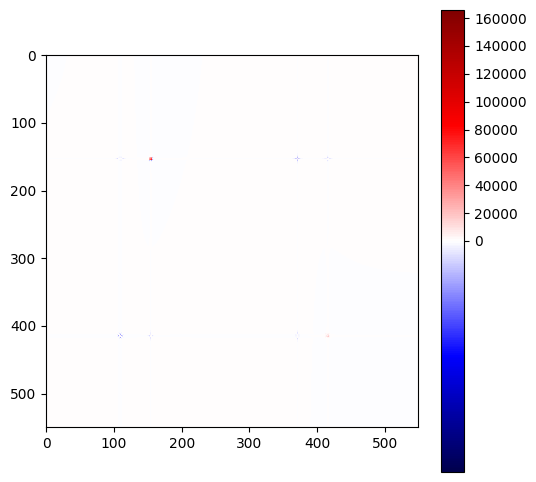

In [224]:
fid_test_cos = fid_1_ref - fid_3_ref
fid_test_sin = fid_2_ref - fid_4_ref

#Npts = 512
Npts = 1024

Spec=-1.0*GenNOESY_from_cos_sin(fid_test_cos,fid_test_sin,Npts,Npts)

norm = TwoSlopeNorm(vmin=np.min(np.real(Spec)), vcenter=0, vmax=np.max(np.real(Spec)))

plt.figure(figsize=(6, 6))
#plt.imshow(np.real(Spec[50:450,50:450]), cmap='seismic',norm=norm)
plt.imshow(np.real(Spec[250:800,250:800]), cmap='seismic',norm=norm)
plt.colorbar()

#plt.savefig('./plots/ALANOESY_Rand_25e2pts_50reps.pdf', format='pdf', dpi=300,bbox_inches='tight')
plt.show()

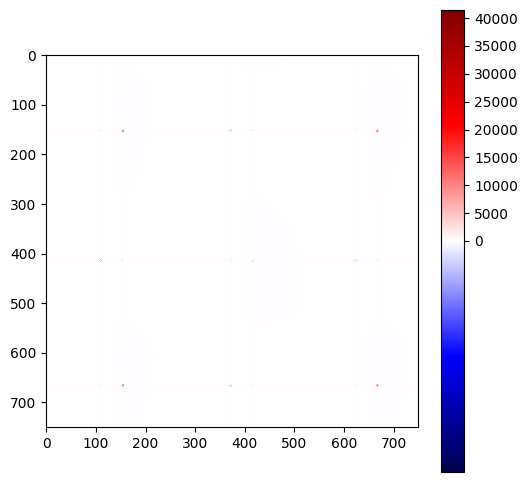

In [228]:
#We get the reference FID from the reference spectrum instead of pre-processing the time-signals, just to observe the effect of discretization...

ref_FID = np.fft.ifft2(np.real(Spec))


####Filtering the signal and Fourier transforming it...
Npts = 512

strd = int(1024/Npts)


Filt_FID =  np.zeros_like(ref_FID)

for i in range(Npts):
    for j in range(Npts):
        Filt_FID[strd*i,strd*j] = ref_FID[strd*i,strd*j] 

filt_spec= np.fft.fft2(Filt_FID)


norm = TwoSlopeNorm(vmin=np.min(np.real(filt_spec)), vcenter=0, vmax=np.max(np.real(filt_spec)))

plt.figure(figsize=(6, 6))
#plt.imshow(np.real(Spec[50:450,50:450]), cmap='seismic',norm=norm)
#plt.imshow(np.real(filt_spec[200:250,0:75]), cmap='seismic',norm=norm)
plt.imshow(np.real(filt_spec[250:1000,250:1000]), cmap='seismic',norm=norm)
plt.colorbar()

#plt.savefig('./plots/ALANOESY_Rand_25e2pts_50reps.pdf', format='pdf', dpi=300,bbox_inches='tight')
plt.show()




In [231]:
of.commutator(of.QubitOperator('Y0 Y1'),of.QubitOperator('Z0 Z1'))

0

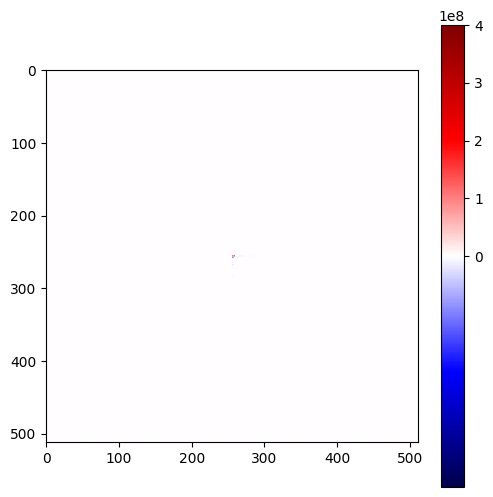

In [92]:
###definition of the "frequency picket fence"
Npts=512
N = 10000
deltT = 2.5e-4

omegas = np.arange(0+1e-5,Npts)

Pick_fence = np.zeros([Npts,Npts])

for i in range(Npts):
    for j in range(Npts):
        Pick_fence[i,j] = np.sin((N+0.5)*omegas[i]*deltT)/np.sin(omegas[i]*deltT/2.0)*np.sin((N+0.5)*omegas[j]*deltT)/np.sin(omegas[j]*deltT/2.0)
        #Pick_fence[i,j] += np.sin((N+0.5)*omegas[j]*deltT)/np.sin(omegas[j]*deltT/2.0)


norm = TwoSlopeNorm(vmin=np.min(np.real(Pick_fence)), vcenter=0, vmax=np.max(np.real(Pick_fence)))

plt.figure(figsize=(6, 6))
plt.imshow(np.real(np.fft.fftshift(Pick_fence)), cmap='seismic',norm=norm)
plt.colorbar()

#plt.savefig('./plots/ALANOESY_Rand_25e2pts_50reps.pdf', format='pdf', dpi=300,bbox_inches='tight')
plt.show()


In [93]:
result = convolve2d(np.real(Spec), np.fft.fftshift(Pick_fence), mode='same')

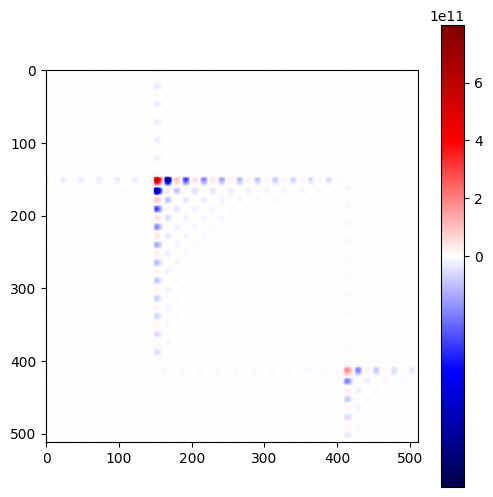

In [90]:
norm = TwoSlopeNorm(vmin=np.min(np.real(result)), vcenter=0, vmax=np.max(np.real(result)))

plt.figure(figsize=(6, 6))
plt.imshow(np.real(result), cmap='seismic',norm=norm)
plt.colorbar()

#plt.savefig('./plots/ALANOESY_Rand_25e2pts_50reps.pdf', format='pdf', dpi=300,bbox_inches='tight')
plt.show()

In [57]:
np.max(np.real(result)), np.min(np.real(result))

(396814247.92279106, -84661077.30729882)

In [ ]:

norm = TwoSlopeNorm(vmin=np.min(np.real(result)), vcenter=0, vmax=np.max(np.real(result)))

plt.figure(figsize=(6, 6))
plt.imshow(np.real(result), cmap='seismic',norm=norm)
plt.colorbar()

#plt.savefig('./plots/ALANOESY_Rand_25e2pts_50reps.pdf', format='pdf', dpi=300,bbox_inches='tight')
plt.show()

In [88]:
fid_test_cos = fid_1_ref - fid_3_ref
fid_test_sin = fid_2_ref - fid_4_ref


Npts = 128
filt_fid_test_cos = np.zeros([Npts,Npts],dtype=complex)#np.zeros_like(fid_test_cos)
filt_fid_test_sin = np.zeros([Npts,Npts],dtype=complex)

strd = int(1024/Npts)


for i in range(Npts):
    for j in range(Npts):
        #filt_fid_test_cos[31*i,31*j] = fid_test_cos[31*i,31*j]
        #filt_fid_test_sin[31*i,31*j] = fid_test_sin[31*i,31*j]
        filt_fid_test_cos[i,j] = fid_test_cos[(strd-1)*i,(strd-1)*j]
        filt_fid_test_sin[i,j] = fid_test_sin[(strd-1)*i,(strd-1)*j]



In [89]:
filt_fid_test_cos.shape

(128, 128)

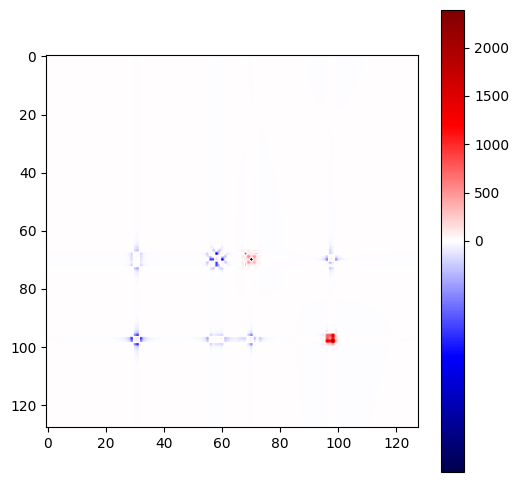

In [90]:
Filt_spec=-1.0*GenNOESY_from_cos_sin(filt_fid_test_cos,filt_fid_test_sin,Npts,Npts)

norm = TwoSlopeNorm(vmin=np.min(np.real(Filt_spec)), vcenter=0, vmax=np.max(np.real(Filt_spec)))

plt.figure(figsize=(6, 6))
plt.imshow(np.real(Filt_spec), cmap='seismic',norm=norm)
plt.colorbar()

#plt.savefig('./plots/ALANOESY_Rand_25e2pts_50reps.pdf', format='pdf', dpi=300,bbox_inches='tight')
plt.show()

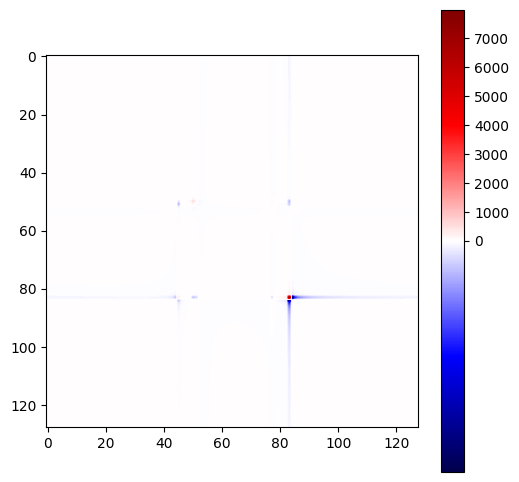

In [559]:
Filt_spec=-1.0*GenNOESY_from_cos_sin(fid_test_cos,fid_test_sin,Npts,Npts)

norm = TwoSlopeNorm(vmin=np.min(np.real(Filt_spec)), vcenter=0, vmax=np.max(np.real(Filt_spec)))

plt.figure(figsize=(6, 6))
plt.imshow(np.real(Filt_spec), cmap='seismic',norm=norm)
plt.colorbar()

#plt.savefig('./plots/ALANOESY_Rand_25e2pts_50reps.pdf', format='pdf', dpi=300,bbox_inches='tight')
plt.show()




10.0

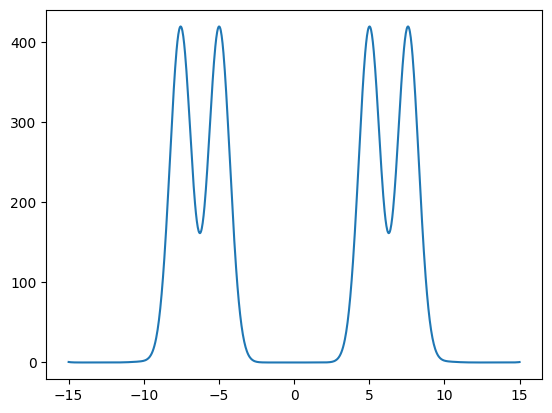

In [141]:
#####Fourier transform of a picket-fence time signal for N points...

x = np.linspace(-15,15,1000)
N = 100
deltT = 0.5

#N = 1000
#deltT = 0.1



#plt.plot(x,np.sin((N+0.5)*x*deltT)/np.sin(x*deltT/2.0))

####The fourier transform of a gaussian times a picket fence is the convolution of their Fourier transforms...

sigma=1.0
gauss1 =  np.exp(-np.square(x+5)/sigma)

gauss2 = np.exp(-np.square(x-5)/sigma)

gauss = gauss1+gauss2
Freq_fence = np.sin((N+0.5)*x*deltT)/np.sin(x*deltT/2.0)

convolution = np.convolve(gauss,Freq_fence, mode='same')

plt.plot(x,convolution)
#plt.plot(x,gauss1+gauss2)
#plt.plot(x,Freq_fence)




In [138]:
2*np.pi/10

0.6283185307179586

In [137]:
#To avoid the spurious "interference" effect when increasing the time-step, we should choose \deltaT < 2*np.pi/\DeltaW
#where \Deltaw is the difference in frequencies between the signals that we aim to resolve...

0.6283185307179586

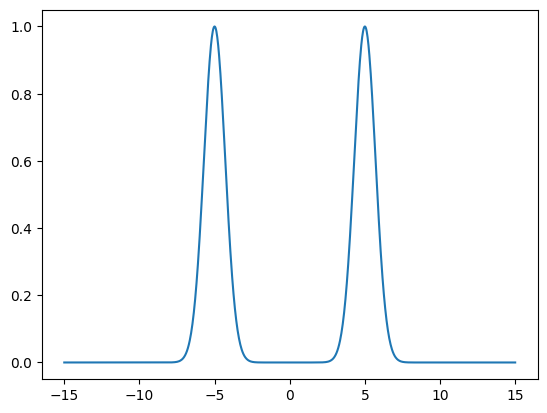

In [135]:
plt.plot(x,gauss)

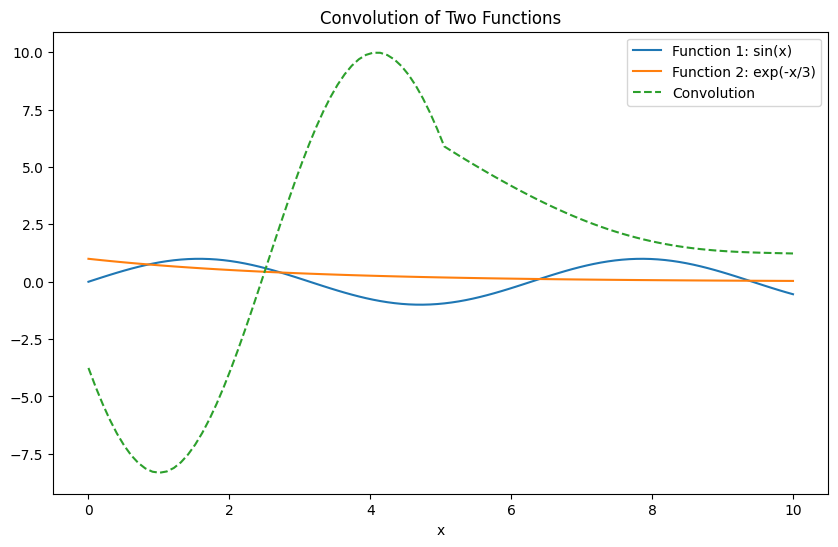

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Define two functions (or discrete signals) as arrays
x = np.linspace(0, 10, 100)
f1 = np.sin(x)  # Example function 1
f2 = np.exp(-x / 3)  # Example function 2

# Perform convolution using numpy
convolution = np.convolve(f1, f2, mode='same')  # mode='same' gives output of same length as f1

# Plot the original functions and their convolution
plt.figure(figsize=(10, 6))
plt.plot(x, f1, label='Function 1: sin(x)')
plt.plot(x, f2[:100], label='Function 2: exp(-x/3)')  # Adjust length for visualization
plt.plot(x, convolution, label='Convolution', linestyle='--')
plt.legend()
plt.title('Convolution of Two Functions')
plt.xlabel('x')
plt.show()


In [59]:
2**10

1024

In [61]:
1024/32

32.0